# **Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# **Data**

In [2]:
# Reading data - wcota
data_path = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv'

df = pd.read_csv(data_path) 
df.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(12894, 22)

In [3]:
# df.to_csv('cases-brazil-states.csv')

## **Data until June 30**

In [16]:
date = '2020-06-30'

df_june = df[df['date'] <= date].copy()
print(df_june.shape)
df_june.tail()

(3094, 22)


,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
3089,27,2020-06-30,Brazil,SC,TOTAL,17,341,1298,26354,341,26354,4.75939,367.82665,0.01294,20505.0,5540.0,90752.0,1266.63901,NaN,NaN,NaN,NaN
3090,27,2020-06-30,Brazil,SE,TOTAL,23,676,594,25411,676,25411,29.40798,1105.45283,0.02660,10109.0,11886.0,44299.0,1927.13608,NaN,NaN,NaN,NaN
3091,27,2020-06-30,Brazil,SP,TOTAL,365,14763,6235,281380,14763,281380,32.15006,612.77401,0.05247,49295.0,263250.0,602384.0,1311.83901,NaN,NaN,NaN,NaN
3092,27,2020-06-30,Brazil,TO,TOTAL,4,204,458,11222,200,10764,12.96995,713.47464,0.01818,6916.0,768.0,19882.0,1264.06191,NaN,NaN,NaN,NaN
3093,27,2020-06-30,Brazil,TOTAL,TOTAL,1317,59792,39680,1412669,59594,1402041,28.23631,667.12209,0.04233,792488.0,739535.0,3203771.0,1512.95626,NaN,NaN,NaN,NaN


In [91]:
# df_june.to_csv('cases-brazil-states-june30.csv')

In [19]:
state = 'RJ'

df_state = df_june[df_june.state == state].reset_index()
print(df_state.shape)
df_state.head()

(118, 23)


,index,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
0,18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,1,0.0,0.00579,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,1,0.0,0.01158,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,2,0.0,0.01158,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Creating new recovered column
df_state["newRecovered"] = df_state["recovered"].diff()
df_state.newRecovered.fillna(0, inplace=True)
df_state.recovered.fillna(0, inplace=True)

In [21]:
# Creating active cases column (Infected)
active_infected = [df_state["totalCases"].iloc[0]]
for nc, nr in zip(df_state["newCases"].iloc[1:], 
                  df_state["newRecovered"].iloc[1:]):
    active_infected.append(active_infected[-1] + nc - nr)
df_state["activeCases"] = active_infected

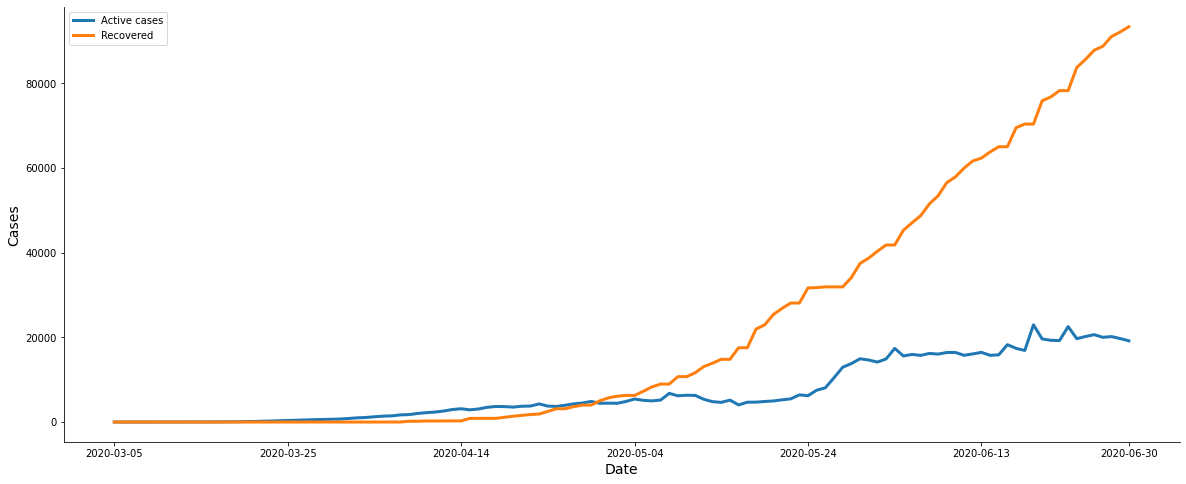

In [46]:
plot1 = 'activeCases'
plot2 = 'recovered'

fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.plot(df_state.date, df_state[plot1], label='Active cases', linewidth=3)
ax2 = ax.plot(df_state.date, df_state[plot2], label='Recovered', linewidth=3)
ax.set_xlabel('Date', size=14)
ax.set_ylabel('Cases', size=14)

ax.legend()
show_index = [0,20,40,60,80,100,117]
ax.set_xticks(df_state.loc[show_index, 'date'])
ax.set_xticklabels(df_state.loc[show_index, 'date'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## **After June 30**

In [ ]:
df_after_june = df[df['date'] > date].copy()
print(df_after_june.shape)
df_after_june.head()

(9800, 22)


,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
3094,27,2020-07-01,Brazil,AC,TOTAL,5,370,462,13715,370,13715,41.95321,1555.10327,0.02698,7650.0,288.0,32164.0,3646.98079,NaN,NaN,NaN,NaN
3095,27,2020-07-01,Brazil,AL,TOTAL,20,1072,857,36819,1072,36819,32.12123,1103.23828,0.02912,28236.0,2156.0,79652.0,2386.67904,NaN,NaN,NaN,NaN
3096,27,2020-07-01,Brazil,AM,TOTAL,20,2843,1461,72284,2843,72284,68.59533,1744.05376,0.03933,58822.0,2446.0,165743.0,3999.01366,NaN,NaN,NaN,NaN
3097,27,2020-07-01,Brazil,AP,TOTAL,3,420,435,28927,420,28927,49.66118,3420.35470,0.01452,14168.0,4327.0,51162.0,6049.44125,NaN,NaN,NaN,NaN
3098,27,2020-07-01,Brazil,BA,TOTAL,49,1902,3178,76485,1902,76485,12.78822,514.25180,0.02487,50924.0,78797.0,242798.0,1632.46793,NaN,NaN,NaN,NaN


In [93]:
# df_after_june.to_csv('/content/drive/MyDrive/Trabalho/Covid/Datasets/cases-brazil-states-after-june30.csv')

In [47]:
state = 'SP'

df_state = df_after_june[df_after_june.state == state].reset_index()
print(df_state.shape)
df_state.head()

(350, 23)


,index,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
0,3119,27,2020-07-01,Brazil,SP,TOTAL,267,15030,8555,289935,15030,289935,32.73151,631.40463,0.05184,157845.0,263250.0,602384.0,1311.83901,NaN,NaN,NaN,NaN
1,3147,27,2020-07-02,Brazil,SP,TOTAL,321,15351,12244,302179,15351,302179,33.43057,658.06894,0.05080,162851.0,263250.0,602384.0,1311.83901,NaN,NaN,NaN,NaN
2,3175,27,2020-07-03,Brazil,SP,TOTAL,343,15694,8523,310702,15694,310702,34.17754,676.62987,0.05051,162851.0,272384.0,602384.0,1311.83901,NaN,NaN,NaN,NaN
3,3203,27,2020-07-04,Brazil,SP,TOTAL,302,15996,1828,312530,15996,312530,34.83522,680.61079,0.05118,174289.0,277156.0,602384.0,1311.83901,NaN,NaN,NaN,NaN
4,3231,28,2020-07-05,Brazil,SP,TOTAL,82,16078,7649,320179,16078,320179,35.01379,697.26836,0.05022,175439.0,277156.0,602384.0,1311.83901,NaN,NaN,NaN,NaN


In [48]:
# Creating new recovered column
df_state["newRecovered"] = df_state["recovered"].diff()
df_state.newRecovered.fillna(0, inplace=True)
df_state.recovered.fillna(0, inplace=True)

In [49]:
# Creating active cases column (Infected)
active_infected = [df_state["totalCases"].iloc[0]]
for nc, nr in zip(df_state["newCases"].iloc[1:], 
                  df_state["newRecovered"].iloc[1:]):
    active_infected.append(active_infected[-1] + nc - nr)
df_state["activeCases"] = active_infected

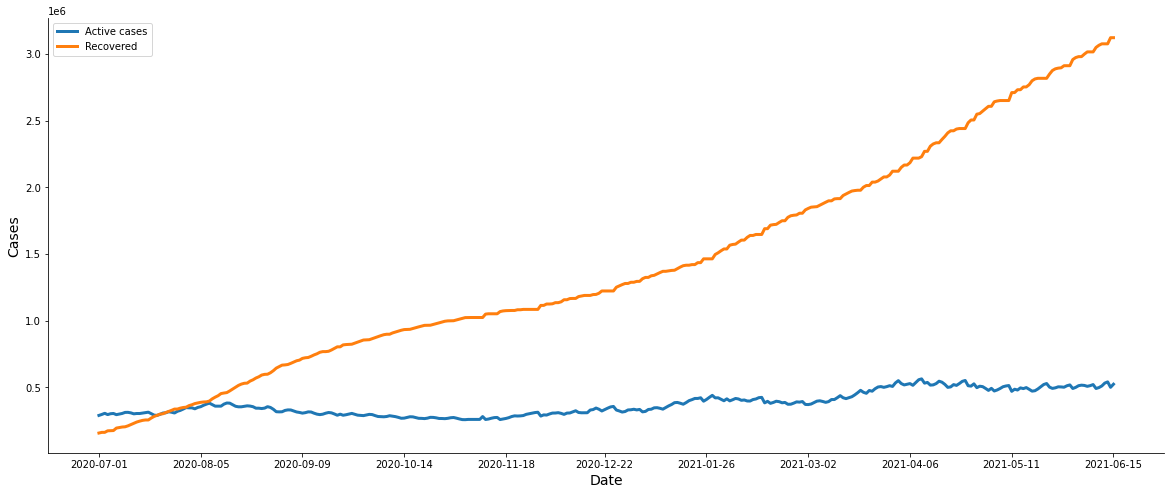

In [90]:
plot1 = 'activeCases'
plot2 = 'recovered'

fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.plot(df_state.date, df_state[plot1], label='Active cases', linewidth=3)
ax2 = ax.plot(df_state.date, df_state[plot2], label='Recovered', linewidth=3)
ax.set_xlabel('Date', size=14)
ax.set_ylabel('Cases', size=14)

ax.legend()
show_index = np.round(np.linspace(0, 349, 11))
ax.set_xticks(df_state.loc[show_index, 'date'])
ax.set_xticklabels(df_state.loc[show_index, 'date'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()